In [1]:
import numpy as np

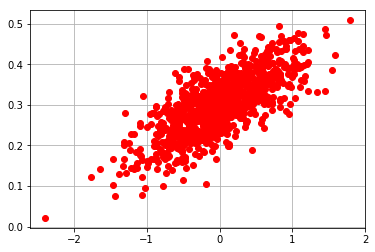

In [2]:
n = 1000
v = []
for i in xrange(n):
    x1 = np.random.normal(0.0, 0.55)
    y1 = 0.1 * x1 + 0.3 + np.random.normal(0.0, 0.05)
    v.append((x1,y1))
    
vx = [a[0] for a in v]
vy = [a[1] for a in v]
import matplotlib.pyplot as plt
plt.plot(vx, vy, 'ro')
plt.grid()
plt.show()

In [3]:
# y = ax + b model

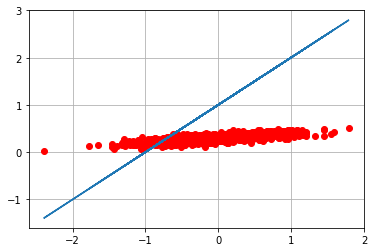

747.136875476


In [4]:
# initial guess
a = 1
b = 1

def cost():
    r = 0
    for ix in xrange(len(vx)):
        r += (vy[ix] - (a * vx[ix] + b)) ** 2
    return r

def plot():
    vy2 = []
    for ix in xrange(len(vx)):
        vy2.append(vx[ix] * a + b)
    plt.plot(vx, vy, 'ro')
    plt.plot(vx, vy2)
    plt.grid()
    plt.show()

plot()
print cost()

0.0975521592781 0.300320398766 2.38302276764


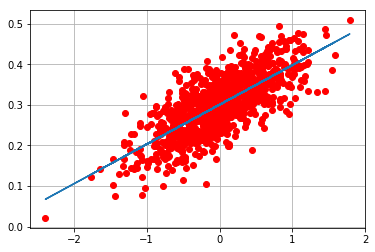

In [5]:
# initial guess
a = 1
b = 1

# learning rate
lr = 0.000005

def cost():
    r = 0
    for ix in xrange(len(vx)):
        r += (vy[ix] - (a * vx[ix] + b)) ** 2
    return r

def gradient():
    r = [0, 0]
    for ix in xrange(len(vx)):
        r[0] += -2 * vx[ix] * (vy[ix] - (a * vx[ix] + b))
        r[1] += -2 * (vy[ix] - (a * vx[ix] + b))
    return r
        
iteration = 7000
for ix in xrange(iteration):
    g = gradient()
    a = a + -lr * g[0]
    b = b + -lr * g[1]

print a, b, cost()
plot()

0.0975521586936 0.300320398772


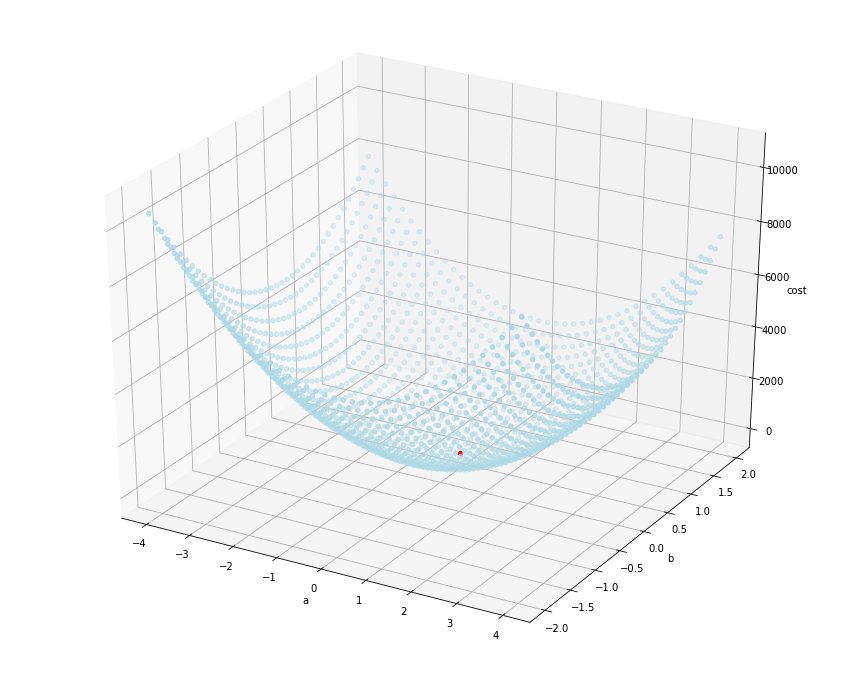

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111, projection='3d')


def cost():
    r = 0
    for ix in xrange(len(vx)):
        r += (vy[ix] - (a * vx[ix] + b)) ** 2
    return r


va = [];vb = [];vc = []
for aa in range(-20,21):
    a = 1.0 * aa / 5
    for bb in range(-20, 21):
        b = 1.0 * bb / 10
        c = cost()
        va.append(a);vb.append(b);vc.append(c)
ax.scatter(va, vb, vc, color='lightblue', depthshade=True)

# a = 1;b = 1
iteration = 10000
for ix in xrange(iteration):
    g = gradient()
    a = a + -lr * g[0]
    b = b + -lr * g[1]
print a, b
ax.scatter([a], [b], [cost()], c='red', depthshade=False)

ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('cost')
plt.show()